In [2]:
!pip install scikeras

In [6]:
!pip install --upgrade scikeras

<Sequential name=sequential_12, built=True>
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4939 - loss: 5.6473
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6753 - loss: 1.3988
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.8597
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7508 - loss: 0.7300
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.5811
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4948
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8064 - loss: 0.4986
Epoch 8/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4682
Epoch 9/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8231 - loss: 0.4279
Epoch 10/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8352 - loss: 0.4024
Epoch 11/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8384 - loss: 0.3939
Epoch 12/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8375 - loss: 0.3846


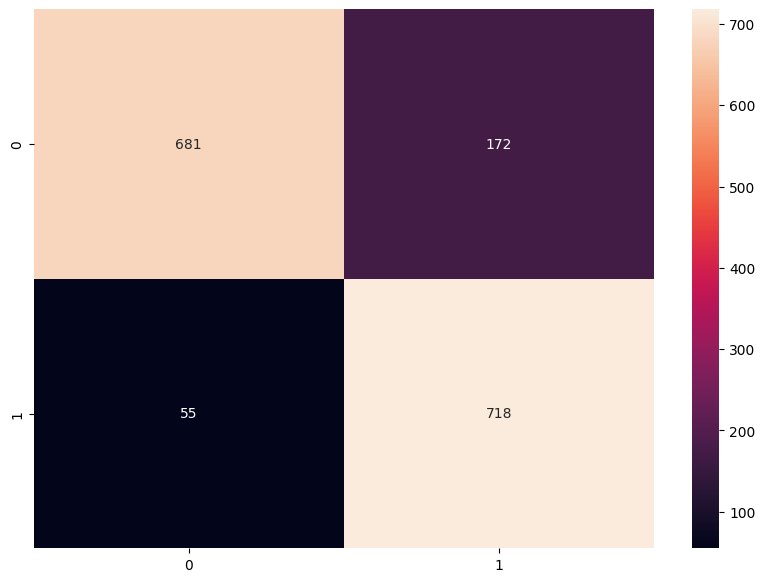

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Cross-validation mean accuracy: 0.8442021857923496

Cross-validation variance: 7.784412624404981e-05

Cross-validation standard deviation: 0.008822931839476593
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
AUC: 0.917


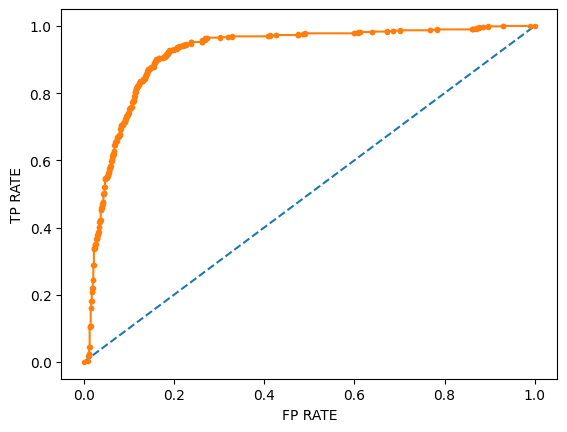

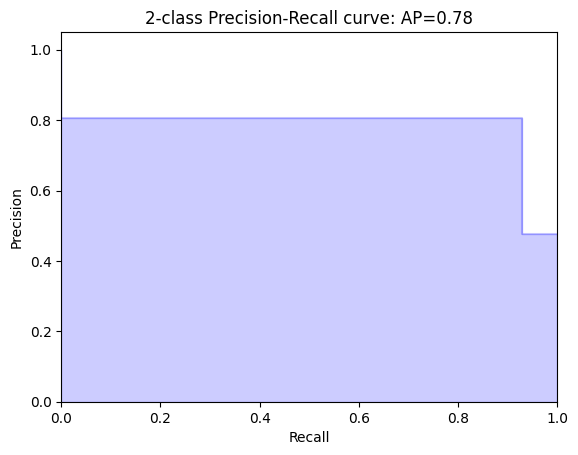

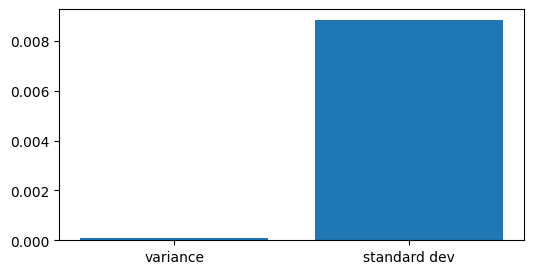

In [12]:
"""

"""

import numpy as np, pandas as pd, seaborn as sn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_recall_curve
from inspect import signature
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
#----------------------------------------------------------------------------------------------------------
# Creazione modello della rete neurale

def create_model(input_dim):
    network = Sequential()
    network.add(Dense(30, input_dim=input_dim, activation="relu"))
    network.add(Dense(1, activation='sigmoid'))
    network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return network

#----------------------------------------------------------------------------------------------------------

np.random.seed(7)

# Funzione per la pulizia e trasformazione dei dati

def clean_data(data):
    """Converte le colonne stringa in numerico e mappa i valori categorici."""
    for col in data.columns:
        data[col] = data[col].astype('string')
        data[col] = data[col].astype('float', errors='ignore')

    data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 2})
    data['Dyslexia'] = data['Dyslexia'].map({'No': 0, 'Yes': 1})
    data['Nativelang'] = data['Nativelang'].map({'No': 0, 'Yes': 1})
    data['Otherlang'] = data['Otherlang'].map({'No': 0, 'Yes': 1})

# Caricamento dataset
desktop_data = pd.read_csv("/content/Dyslexia_dataset.csv", sep=';', encoding='utf-8')
clean_data(desktop_data)

# Selezione delle colonne di interesse
features = ['Gender', 'Nativelang', 'Otherlang', 'Age', 'Dyslexia']
for i in range(30):
    if (i in list(range(12)) + list(range(13, 17)) + [21, 22, 29]):
        for metric in ['Clicks', 'Hits', 'Misses', 'Score', 'Accuracy', 'Missrate']:
            features.append(f'{metric}{i+1}')

desktop_data = desktop_data[features]

# Separazione delle variabili dipendenti e indipendenti
y = desktop_data['Dyslexia']
X = desktop_data.drop(columns=['Dyslexia'])

# Applicazione di SMOTE per gestire il bilanciamento delle classi
oversample = SMOTE()
X, y = oversample.fit_resample (X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 13)

# Creazione e addestramento del modello
model = create_model(X_train.shape[1])
print(model)
model.fit(X_train, y_train, epochs=30, batch_size=64)

# Valutazione delle prestazioni del modello
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Calcolo delle previsioni e valutazione dell'accuratezza
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]
accuracy = accuracy_score(y_test, rounded)

print ('\naccuracy_score:',accuracy)

# Stampa del report di classificazione e della matrice di confusione
print ('\nClasification report:\n',classification_report(y_test, rounded))
print ('\nConfussion matrix:\n',confusion_matrix(y_test, rounded))

# Visualizzazione della matrice di confusione tramite heatmap
confusion_matrix = confusion_matrix(y_test, rounded)
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#--------------Cross-Validation----------------------------------------
# Creazione della KFold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=13)
cv_scores = []

# Esecuzione della cross-validation manualmente
for train_index, val_index in cv.split(X_train, y_train):
    # Creazione dei dati di addestramento e di validazione
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Creazione del modello
    model = create_model(X_train_fold.shape[1])

    # Addestramento del modello
    model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=64, verbose=0)

    # Previsioni sul set di validazione
    predictions = model.predict(X_val_fold)
    predictions = [round(x[0]) for x in predictions]

    # Calcolo della metrica di performance (accuracy)
    accuracy = accuracy_score(y_val_fold, predictions)
    cv_scores.append(accuracy)

# Stampa delle statistiche ottenute dalla cross-validation manuale
print('\nCross-validation mean accuracy: {}'.format(np.mean(cv_scores)))
print('\nCross-validation variance: {}'.format(np.var(cv_scores)))
print('\nCross-validation standard deviation: {}'.format(np.std(cv_scores)))
#-----------------------------------------------------------------------

# Calcolo della curva ROC e AUC
probs = model.predict (X_test)
probs = probs[:, 0]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calcola roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('FP RATE')
pyplot.ylabel('TP RATE')
pyplot.show()

# Calcolo della curva Precision-Recall
average_precision = average_precision_score(y_test, rounded)
precision, recall, _ = precision_recall_curve(y_test, rounded)

# in matplotlib versione < 1.5, plt.fill_between non dispone dell'argomento 'step'.
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

# Calcolo e stampa dell'F1-score
f1 = f1_score(y_test, rounded)

data = {'variance': np.var(cv_scores), 'standard dev': np.std(cv_scores)}
names = list(data.keys())
values = list(data.values())
fig,axs = plt.subplots(1, 1, figsize=(6, 3), sharey=True)
axs.bar(names, values)
plt.show()